# Loan Prediction (ML Project)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset

In [ ]:
data = pd.read_csv('/content/train.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


checking for null values

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Imputation using Mean and mode

In [ ]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
data.Gender = data.Gender.fillna('Male')

In [ ]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
data.Married = data.Married.fillna('Yes')

In [ ]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data.Dependents = data.Dependents.fillna('0')

In [ ]:
data['Self_Employed'] = data.Self_Employed.fillna('No')

In [ ]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [ ]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [ ]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Spliting the dataset

In [ ]:
x = data.iloc[:,1:12].values
y = data.iloc[:,12].values

In [ ]:
x

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

# Splitting the dataset into training and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 8)

In [ ]:
x_train

array([['Male', 'Yes', '0', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 180.0, 1.0, 'Urban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban'],
       ...,
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '2', ..., 300.0, 1.0, 'Urban']], dtype=object)

# Encoding the categorical data and independent variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in range(0,5):
  x_train[:,i] = le.fit_transform(x_train[:,i])

x_train[:,10] = le.fit_transform(x_train[:,10])

# Encoding the dependent variable

In [ ]:
lc = LabelEncoder()
y_train = lc.fit_transform(y_train)

In [ ]:
x_train

array([[1, 1, 0, ..., 360.0, 1.0, 0],
       [1, 1, 0, ..., 180.0, 1.0, 2],
       [1, 1, 0, ..., 360.0, 1.0, 1],
       ...,
       [1, 1, 2, ..., 360.0, 1.0, 1],
       [1, 1, 3, ..., 360.0, 1.0, 0],
       [1, 1, 2, ..., 300.0, 1.0, 2]], dtype=object)

# Encoding the test data

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for i in range(0,5):
  x_test[:,i] = le.fit_transform(x_test[:,i])
x_test[:,10] = le.fit_transform(x_test[:,10])

# Encoding the dependent variable
lc = LabelEncoder()
y_test = lc.fit_transform(y_test)

In [ ]:
x_test

array([[1, 0, 2, ..., 360.0, 0.0, 0],
       [1, 0, 0, ..., 360.0, 1.0, 2],
       [1, 1, 1, ..., 360.0, 1.0, 0],
       ...,
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [1, 1, 1, ..., 360.0, 1.0, 1],
       [1, 0, 0, ..., 360.0, 1.0, 0]], dtype=object)

# Feature Scaling

Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance = pca.explained_variance_ratio_

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 8)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=8)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn import metrics
accuracy_lr = metrics.accuracy_score(y_pred, y_test)*100
print('Logistic Regression Accuracy :', accuracy_lr)

Logistic Regression Accuracy : 71.42857142857143


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
accuracy_nb = metrics.accuracy_score(y_pred, y_test)*100
print('Naive Bayes Accuracy :', accuracy_nb)

Naive Bayes Accuracy : 69.48051948051948


# SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 8)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=8)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
accuracy_svm = metrics.accuracy_score(y_pred, y_test)*100
print('SVM Accuracy :', accuracy_svm)

SVM Accuracy : 71.42857142857143


# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 8)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=8)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
accuracy_dtc = metrics.accuracy_score(y_pred, y_test)*100
print('Decision Tree classifier Accuracy :', accuracy_dtc)

Decision Tree classifier Accuracy : 57.7922077922078


# Comparing accuracy of all the models

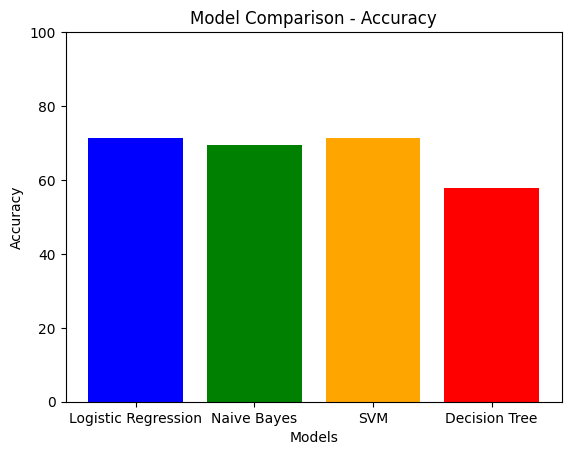

In [ ]:
# Model Comparison - Visualization
models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree']
accuracies = [accuracy_lr, accuracy_nb, accuracy_svm, accuracy_dtc]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()